# HRTEM simulation

In [78]:
%load_ext autoreload
%autoreload 2
import numpy as np
from ase.build import mx2
from tensorwaves.waves import PlaneWaves
from tensorwaves.potentials import Potential
from tensorwaves.transfer import CTF
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Quick simulation

In [84]:
atoms = read('../data/MoS2.traj')
cell = np.diag(atoms.get_cell())
print('Simulation super cell:', cell)

Simulation super cell: [12.72       11.01584314  5.19      ]


In [66]:
waves = PlaneWaves(sampling=.05, energy=80e3)
waves = waves.multislice(atoms)
waves = waves.apply_ctf(defocus=200, aperture_radius=.03)

Multislice [||||||||||||||||||||||||||||||||||||||||||||||||||] 11/11 


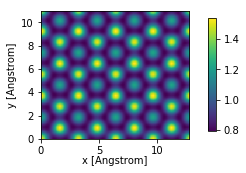

In [69]:
image = waves.image()
image.show()

## Step-by-step simulation

### Set up unit cell

In [73]:
atoms = mx2(formula='MoS2', kind='2H', a=3.18, thickness=3.19)
atoms *= (2,2,1)
atoms.cell[1,0] = 0
atoms.wrap()
atoms *= (2,2,1)
atoms.center(vacuum=1, axis=2)

cell = np.diag(atoms.get_cell())

print('Simulation super cell:', cell)

Simulation super cell: [12.72       11.01584314  5.19      ]


### Create Potential

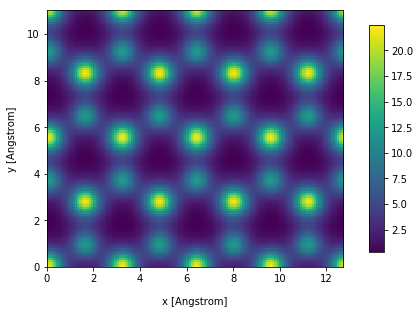

In [74]:
potential = Potential(atoms=atoms, parametrization='kirkland', num_slices=10, sampling=.1)

potential.current_slice = 3

potential.show(fig_scale=2)

### Propagate Wave Function

In [76]:
waves = PlaneWaves(sampling=.05, energy=80e3)
waves = waves.multislice(atoms)

Multislice [||||||||||||||||||||||||||||||||||||||||||||||||||] 11/11 


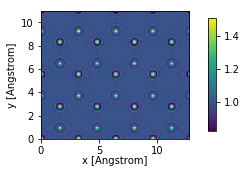

In [77]:
waves.show()

### Apply Contrast Transfer Function

In [81]:
ctf = CTF(defocus=200, aperture_radius=.05)

waves = waves.apply_frequency_transfer(ctf)

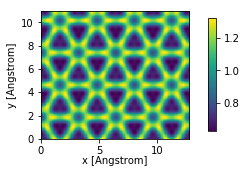

In [82]:
image = waves.image()
image.show()

In [83]:
image.numpy()

array([[[0.6901092 , 0.68912995, 0.6858298 , ..., 0.6863156 ,
         0.6874929 , 0.6892322 ],
        [0.68918794, 0.68862486, 0.6858208 , ..., 0.6847231 ,
         0.6860261 , 0.6879883 ],
        [0.6866846 , 0.68733644, 0.6859807 , ..., 0.680249  ,
         0.6819247 , 0.6845425 ],
        ...,
        [0.68338317, 0.68595433, 0.6868833 , ..., 0.6737958 ,
         0.67608064, 0.67974585],
        [0.686678  , 0.68733025, 0.6859747 , ..., 0.6802416 ,
         0.68191737, 0.6845352 ],
        [0.689186  , 0.68862313, 0.68581915, ..., 0.6847207 ,
         0.68602383, 0.68798625]]], dtype=float32)